<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3_MIO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EN ESTE EJERCICIO VOY A INTENTAR HACER TODO EN PYTHON.
# TRABAJO CON EL ARCHIVO U239_IMPORTADO QUE TENGO EN LA CARPETA DE MACHINE LEARNING. ESTA IMPORTADO DEL U239 ORIGINAL QUE TENGO EN MAESTRO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [4]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [5]:
df.head()

,Tall,Referencia,Fecha Fa,Fec.aper,Cta.car,Nombre cliente,Cta.tit,Nombre titular,Recamb.,RECAMBIOS PVP,Tiem.fac,Total.MO,Modelo,Recep,Matricula,Bastidor,Tipo O.R.,OR UNICA,MES,AÑO,ESTANCIA,ORDEN CORTA
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [6]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [7]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [8]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [9]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301829 entries, 0 to 301828
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            301829 non-null  int64         
 1   Referencia      301829 non-null  int64         
 2   Fecha_Fact      286464 non-null  datetime64[ns]
 3   Fecha_Apertura  301829 non-null  datetime64[ns]
 4   Cta_Cargo       297589 non-null  object        
 5   Nombre_Cliente  301828 non-null  object        
 6   Cta_Titular     301797 non-null  object        
 7   Nombre_Titular  301796 non-null  object        
 8   Recamb          301829 non-null  float64       
 9   Recamb_Pvp      301829 non-null  float64       
 10  Tiemp_Fact      301824 non-null  float64       
 11  Total_Mo        301824 non-null  float64       
 12  Modelo          300462 non-null  object        
 13  Recep           301829 non-null  object        
 14  Matricula       301829 non-null  obj

In [11]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [ ]:
"""# voy a filtrar por fecha
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-07-30")] # CAMBIO LA FECHA Y METO ESTE AÑO. """

'# voy a filtrar por fecha\ndf = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-07-30")] # CAMBIO LA FECHA Y METO ESTE AÑO. '

In [12]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [13]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [14]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Nombre_Cliente"] = df["Nombre_Cliente"].apply(str)
df["Cta_Titular"] = df["Cta_Titular"].apply(str)
df["Nombre_Titular"] = df["Nombre_Titular"].apply(str)
df["Modelo"] = df["Modelo"].apply(str)
df["Recep"] = df["Recep"].apply(str)
df["Matricula"] = df["Matricula"].apply(str)
df["Bastidor"] = df["Bastidor"].apply(str)
df["Tipo_Or"] = df["Tipo_Or"].apply(str)


In [15]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [16]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [17]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [18]:
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("5")!=True]
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("6")!=True]

In [19]:
df.Tipo_Or.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. 

2A O.R.CLIENT MEC AUDI       0.233271
2V O.R.CLIENT MEC VW         0.164638
7A PRESUPUESTO CH AUDI       0.134344
4A GARANTIA MECAN AUDI       0.113659
7V PRESUPUESTO CH VW         0.089115
4V GARANTIA MECAN VW         0.073885
2A O.R.CLIENT MEC AUDI-CO    0.046366
11LV O.R. MEC VW LONG DRI    0.040170
11LA O.R. MEC AU LONG DRI    0.033017
2V O.R.CLIENT MEC VW-CONT    0.029502
7LA PRES  AU CH  LONG DRI    0.005894
1A O.R.CLIENT CH AUDI        0.004626
2RA O.R.CLIENT MEC AUDI -    0.004413
12LA O.R. MEC AU VW RENTI    0.003328
2L O.R.CLIENT MEC LCV        0.003034
7LV PRES  VW CH  LONG DRI    0.003034
DG DEFER.GARANTIA AUDI       0.002949
2RV O.R.CLIENT MEC VW-CRE    0.002672
4L GARANTIA MECAN LCV        0.002183
GD DEFER.GARANTIA MECAN V    0.002030
1V O.R.CLIENT CH VW          0.001860
12LV O.R. MEC VW VW RENTI    0.001672
2L O.R.CLIENT MEC LCV-CON    0.001332
11LL O.R. MEC LCV LONG DR    0.001034
7L PRESUPUESTO CH LCV        0.001017
2RL O.R.CLIENT MEC LCV-CR    0.000272
12LL O.R. ME

In [ ]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,nan,1,2015,39,768394,1760.67,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,nan,1,2015,3,770266,197.45,770266
5,1,7716492,2015-01-02,2014-12-11,116,ORDENES DE REPARACION G,117453,LOPEZ NAVARRO JOSE ANTO,0.00,0.00,0.37,26.20,A4 2.0TDI,272,5848HKH,WAUZZZ8K3DA012518,4A GARANTIA MECAN AUDI,nan,1,2015,22,771649,26.20,771649


In [20]:
df.shape

(235001, 24)

In [21]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Tall                 0
Referencia           0
Fecha_Fact        9736
Fecha_Apertura       0
Cta_Cargo            0
Nombre_Cliente       0
Cta_Titular          0
Nombre_Titular       0
Recamb               0
Recamb_Pvp           0
Tiemp_Fact           5
Total_Mo             5
Modelo               0
Recep                0
Matricula            0
Bastidor             0
Tipo_Or              0
Or_Unica             0
MES                  0
AÑO                  0
ESTANCIA             0
Orden_Corta          0
Fact_total           5
Orden_Corta2         0
dtype: int64

In [22]:
df.Orden_Corta2.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

161408

In [23]:
df.Bastidor.nunique() # tenemos 58.809 vehículos bastidores diferentes. 

51374

In [24]:
df.Fact_total.describe() # aquí tenemos los estadísticos de facturación total. vemos valores negativos que serán los abonos. 

count    234996.000000
mean        398.698096
std         924.069513
min      -32419.720000
25%          68.440000
50%         244.210000
75%         484.760000
max       32419.720000
Name: Fact_total, dtype: float64

In [25]:
df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape

(230757, 24)

In [26]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [27]:
df.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    230757.000000
mean        431.652508
std         822.552194
min           0.000000
25%          80.690000
50%         249.920000
75%         489.070000
90%         901.700000
95%        1365.074000
99%        3331.569600
max       32419.720000
Name: Fact_total, dtype: float64

In [28]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

51361

In [29]:
df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes. 

34

In [30]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 58.714 bastidores. 

51361

In [31]:
df.shape # tenemos 274.898 filas

(230757, 24)

In [ ]:
df.isnull().sum()

Tall                 0
Referencia           0
Fecha_Fact        9592
Fecha_Apertura       0
Cta_Cargo            0
Nombre_Cliente       0
Cta_Titular          0
Nombre_Titular       0
Recamb               0
Recamb_Pvp           0
Tiemp_Fact           5
Total_Mo             0
Modelo               0
Recep                0
Matricula            0
Bastidor             0
Tipo_Or              0
Or_Unica             0
MES                  0
AÑO                  0
ESTANCIA             0
Orden_Corta          0
Fact_total           0
Orden_Corta2         0
dtype: int64

In [32]:
# vamos a quitar todas las filas que no tengan numero de bastidor.
df = df[~df.Bastidor.isnull()]
df.shape

(230757, 24)

In [33]:
# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]

In [34]:
df.Bastidor.nunique() #58058 bastidores. 

50965

In [ ]:
df.Orden_Corta2.nunique()

156978

In [ ]:
df.shape

(218711, 24)

In [ ]:
df.info() # aqui he quitado todos los nulos. podría haberlos sustituido por otra cosa.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215803 entries, 0 to 294070
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            215803 non-null  object        
 1   Referencia      215803 non-null  object        
 2   Fecha_Fact      215803 non-null  datetime64[ns]
 3   Fecha_Apertura  215803 non-null  datetime64[ns]
 4   Cta_Cargo       215803 non-null  object        
 5   Nombre_Cliente  215803 non-null  object        
 6   Cta_Titular     215803 non-null  object        
 7   Nombre_Titular  215803 non-null  object        
 8   Recamb          215803 non-null  float64       
 9   Recamb_Pvp      215803 non-null  float64       
 10  Tiemp_Fact      215798 non-null  float64       
 11  Total_Mo        215803 non-null  float64       
 12  Modelo          215803 non-null  object        
 13  Recep           215803 non-null  object        
 14  Matricula       215803 non-null  obj

In [35]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        5
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
dtype: int64

In [36]:
# creating some columns for exploratory


df['year'] = df['Fecha_Apertura'].dt.year # sacamos el año de la fecha
df['month'] = df['Fecha_Apertura'].dt.month # sacamos el mes
df['day'] = df['Fecha_Apertura'].dt.day # sacamos el día. 
df['day_of_week'] = df['Fecha_Apertura'].dt.dayofweek # sacamos el día de la semana. 

In [37]:
df.head(2)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578,2014,11,11,1
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578,2014,11,11,1


In [38]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2022-10-31 00:00:00


In [39]:
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-10-31")]

In [40]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2022-10-31 00:00:00


# AQUI YA METO SOLO AUDI

In [41]:
df_audi = df.copy()

In [42]:
"""df_audi = df_audi[df_audi["Tall"]== "1", "3", "6"]
reqd_stocks = stocks_df[(stocks_df.Sector == "Technology") & (stocks_df.Price <500)]
df_audi = df_audi[(df_audi.Tall== "1")  (df_audi.Tall== "6") or (df_audi.Tall== "3")]
df_audi = df_audi["Tall"].isin(["1", "3", "6"])"""
df_audi = df_audi.loc[(df['Tall'] == '1') | (df_audi['Tall'] == '3') | (df_audi['Tall'] == '6') ]

In [43]:
df_audi.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137,2015,1,2,4
35,3,7747151,2015-01-02,2015-01-02,99476,SANCHEZ FAUQUIER MARIA,99476,SANCHEZ FAUQUIER MARIA,214.89,429.78,2.40,189.51,AUDI A3 SB,63,0511GMX,WAUZZZ8P79A151117,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774715,404.40,774715,2015,1,2,4
37,3,7747441,2015-01-02,2015-01-02,73994,MORENO CANELO REGINA,73994,MORENO CANELO REGINA,231.09,462.18,2.40,189.46,A-3 2.0TDI,63,1076DRZ,WAUZZZ8P36B002015,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774744,420.55,774744,2015,1,2,4
39,1,7748121,2015-01-02,2015-01-02,129866,NAVIO CEPENA PALOMA,129866,NAVIO CEPENA PALOMA,286.88,589.10,1.00,69.30,TT COUPE,95,1380DNZ,TRUZZZ8N521013525,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774812,356.18,774812,2015,1,2,4
45,6,7756611,2015-01-02,2015-01-02,51542,TECNICAS ORTOPEDICAS AL,51542,TECNICAS ORTOPEDICAS AL,251.48,502.96,0.70,48.51,A6 2.7 TDI,56,5557DRL,WAUZZZ4F66N069364,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,775661,299.99,775661,2015,1,2,4


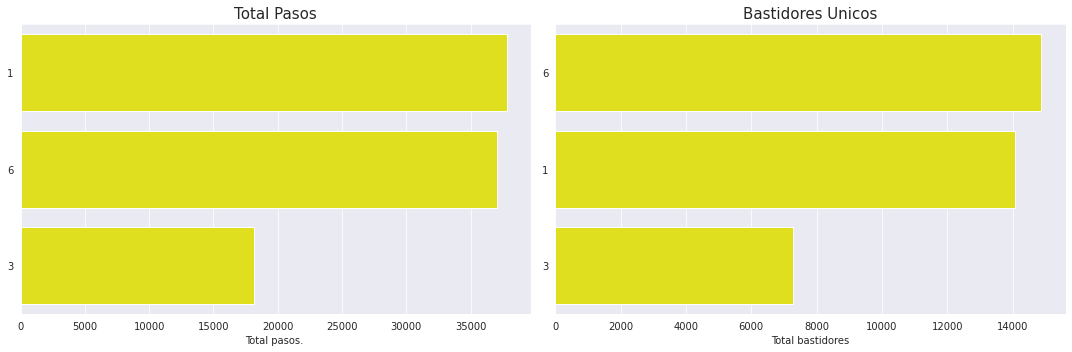

In [44]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_audi.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_audi.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Total pasos. ")
        plt.title("Total Pasos", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [45]:
df_audi.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
6    14877
1    14077
3     7280
Name: Bastidor, dtype: int64

In [46]:
df_audi.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
1    37815
6    37035
3    18181
Name: Orden_Corta2, dtype: int64

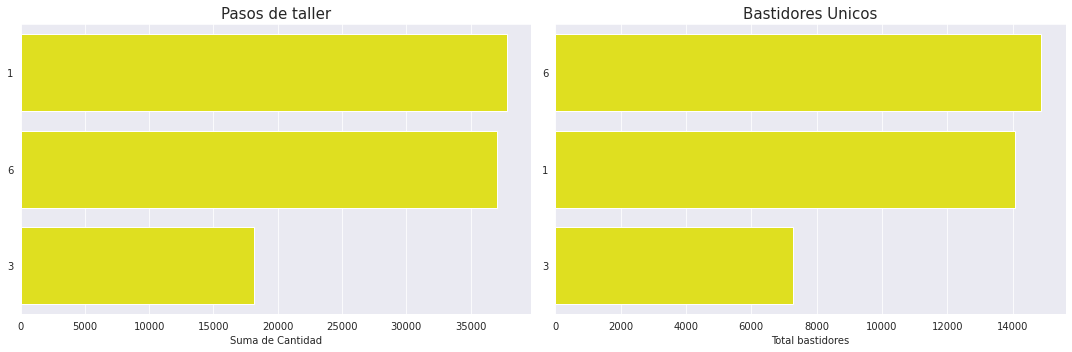

In [47]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_audi.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_audi.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [48]:
df_audi.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
6    14877
1    14077
3     7280
Name: Bastidor, dtype: int64

In [49]:
df_audi.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. 

Tall
6    28861864.37
1    27380620.13
3     7985233.90
Name: Fact_total, dtype: float64

In [50]:
df_audi.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # debería quitar todos los datos anteriores al 2015 y quizas el 2022

year
2019    9305
2018    9062
2017    9052
2020    8448
2021    8328
2016    7857
2022    7708
2015    7283
Name: Bastidor, dtype: int64

In [51]:
df_audi.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 
# si quiero agrupar por mas de una variable se hace así. 

Tall  year
1     2019    3926
      2018    3921
      2017    3916
6     2019    3842
      2020    3691
      2018    3686
      2017    3674
      2021    3561
1     2021    3516
      2022    3423
      2020    3353
      2016    3327
6     2016    3225
      2022    3099
1     2015    3030
6     2015    2880
3     2019    2044
      2017    1961
      2018    1950
      2020    1798
      2015    1779
      2016    1759
      2021    1700
      2022    1561
Name: Bastidor, dtype: int64

In [52]:
df_audi.groupby(["Tall", "year"])["Bastidor"].nunique() # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
1     2015    3030
      2016    3327
      2017    3916
      2018    3921
      2019    3926
      2020    3353
      2021    3516
      2022    3423
3     2015    1779
      2016    1759
      2017    1961
      2018    1950
      2019    2044
      2020    1798
      2021    1700
      2022    1561
6     2015    2880
      2016    3225
      2017    3674
      2018    3686
      2019    3842
      2020    3691
      2021    3561
      2022    3099
Name: Bastidor, dtype: int64

In [53]:
df_audi.groupby(["Tall", "year"])["Orden_Corta2"].nunique() # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
1     2015    4148
      2016    4747
      2017    5674
      2018    5284
      2019    5201
      2020    4126
      2021    4454
      2022    4181
3     2015    2324
      2016    2341
      2017    2638
      2018    2471
      2019    2552
      2020    2088
      2021    2013
      2022    1754
6     2015    3991
      2016    4683
      2017    5270
      2018    5005
      2019    5137
      2020    4562
      2021    4541
      2022    3846
Name: Orden_Corta2, dtype: int64

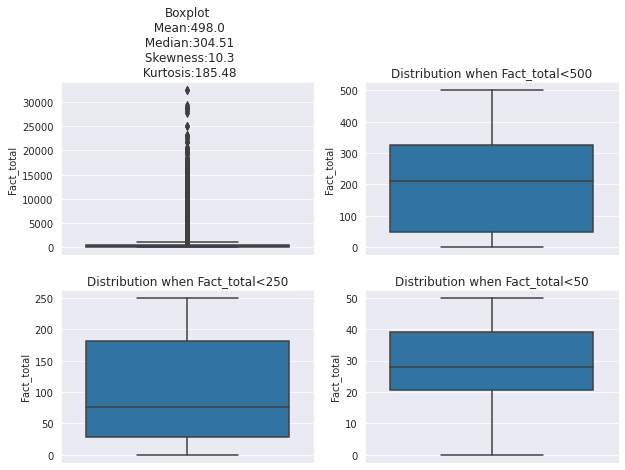

In [54]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df_audi.Fact_total.skew(),2) # calculamos el skewness
kurtosis = round(df_audi.Fact_total.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df_audi.Fact_total),0) # calculamos la media
median = np.median(df_audi.Fact_total) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df_audi.Fact_total)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df_audi[df_audi.Fact_total<500]['Fact_total'])
plt.title('Distribution when Fact_total<500')

plt.subplot(2,2,3)
sns.boxplot(y=df_audi[df_audi.Fact_total<250]['Fact_total'])
plt.title('Distribution when Fact_total<250')

plt.subplot(2,2,4)
sns.boxplot(y=df_audi[df_audi.Fact_total<50]['Fact_total'])
plt.title('Distribution when Fact_total<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos la facturación total. 

In [55]:
df_audi.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    128934.000000
mean        498.144154
std         907.458304
min           0.000000
25%         126.357500
50%         304.510000
75%         553.780000
90%        1016.097000
95%        1536.317000
99%        3755.758100
max       32419.720000
Name: Fact_total, dtype: float64

In [56]:
# vamos a quitar todos los totales superiores a 5.000
df_audi = df_audi[df_audi["Fact_total"]<3756]


In [57]:
df_audi.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
6    14812
1    14031
3     7279
Name: Bastidor, dtype: int64

In [58]:
df_audi.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
1    37608
6    36756
3    18176
Name: Orden_Corta2, dtype: int64

In [59]:
df_audi.Bastidor.nunique()

29472

In [60]:
df_audi.Orden_Corta2.nunique()

92540

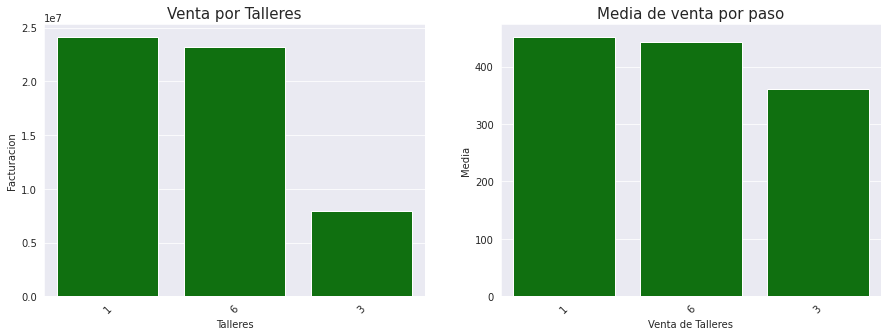

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df_audi.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).values, # agrupamos por taller y facturación total
            x = df_audi.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).index, 
            color='green')

plt.ylabel('Facturacion')
plt.xlabel('Talleres')
plt.xticks(rotation=45)
plt.title('Venta por Talleres',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df_audi.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).values, # agrupamos por taller y media de facturación por paso
            x = df_audi.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Media')
plt.xlabel('Venta de Talleres')
plt.xticks(rotation=45)
plt.title('Media de venta por paso',size=15)

plt.show()

In [62]:
df_audi.Fact_total.mean() # esta es la media de todos los valores. 

432.7336875998871

In [63]:
print(df_audi[df_audi["Tall"]=="1"]["Fact_total"].mean())
print(df_audi[df_audi["Tall"]=="6"]["Fact_total"].mean())
print(df_audi[df_audi["Tall"]=="3"]["Fact_total"].mean())
"""print(df[df["Tall"]=="2"]["Fact_total"].mean())
print(df[df["Tall"]=="10"]["Fact_total"].mean())
print(df[df["Tall"]=="8"]["Fact_total"].mean())"""

451.11943633232244
443.8428614331076
361.52467924184435


'print(df[df["Tall"]=="2"]["Fact_total"].mean())\nprint(df[df["Tall"]=="10"]["Fact_total"].mean())\nprint(df[df["Tall"]=="8"]["Fact_total"].mean())'

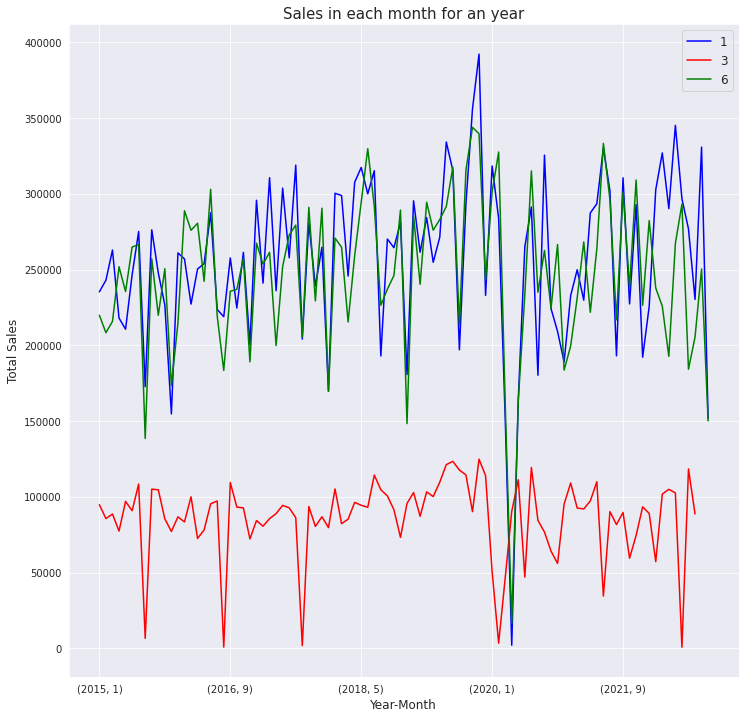

In [64]:
plt.figure(figsize=(12,12))
df_audi[df_audi['Tall']=='1'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df_audi[df_audi['Tall']=='3'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='3',color='red')
df_audi[df_audi['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color="green")
"""df[df['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

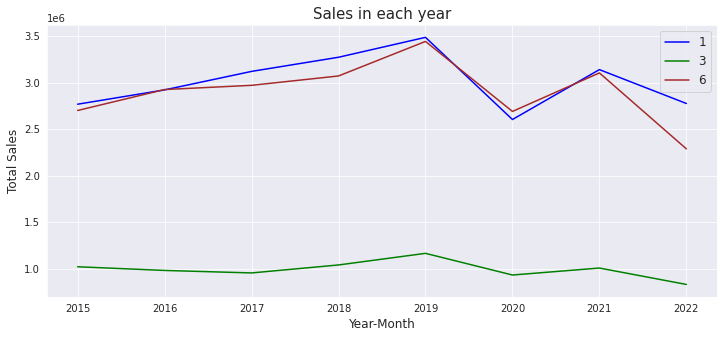

In [65]:
plt.figure(figsize=(12,5))
df_audi[df_audi['Tall']=='1'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
"""df_audi[df_audi['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_audi[df_audi['Tall']=='3'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
"""df_audi[df_audi['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

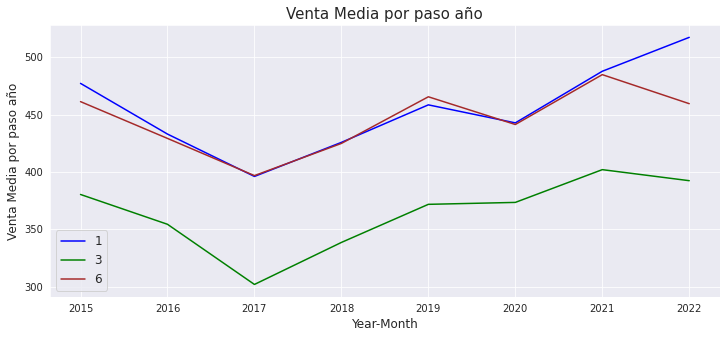

In [66]:
plt.figure(figsize=(12,5))
df_audi[df_audi['Tall']=='1'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='1',color='blue')
"""df_audi[df_audi['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_audi[df_audi['Tall']=='3'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='6',color='brown')
"""df_audi[df_audi['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Venta Media por paso año', size=12)
plt.title('Venta Media por paso año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

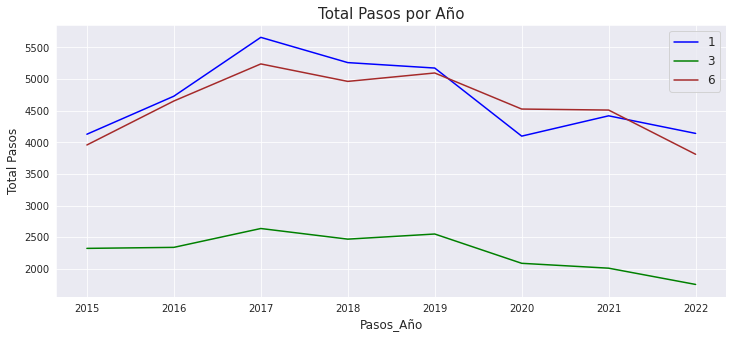

In [67]:
plt.figure(figsize=(12,5))
df_audi[df_audi['Tall']=='1'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='1',color='blue')
"""df_audi[df_audi['Tall']=='2'].groupby(['year'])['Orden_Corta2'].sum().plot(kind='line',label='2',color='red')"""
df_audi[df_audi['Tall']=='3'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='6',color='brown')
"""df_audi[df_audi['Tall']=='8'].groupby(['year'])['Orden_Corta2'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['year'])['Orden_Corta2'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Pasos_Año',size=12)
plt.ylabel('Total Pasos', size=12)
plt.title('Total Pasos por Año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

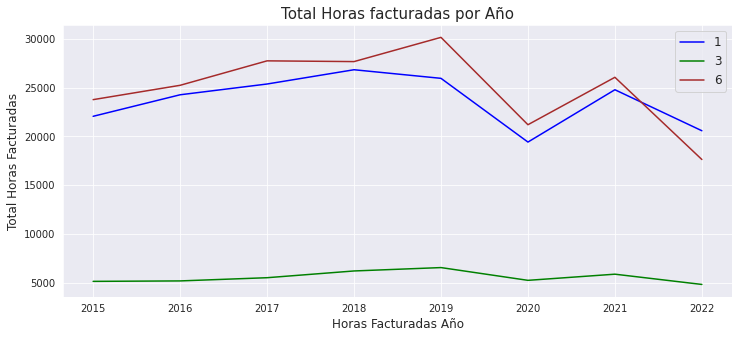

In [68]:
plt.figure(figsize=(12,5))
df_audi[df_audi['Tall']=='1'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='1',color='blue')
"""df_audi[df_audi['Tall']=='2'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='2',color='red')"""
df_audi[df_audi['Tall']=='3'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='6',color='brown')
"""df_audi[df_audi['Tall']=='8'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Horas Facturadas Año',size=12)
plt.ylabel('Total Horas Facturadas', size=12)
plt.title('Total Horas facturadas por Año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

In [69]:
df_audi.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

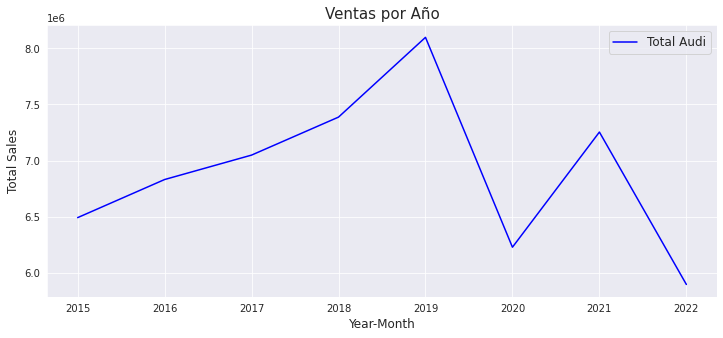

In [70]:
plt.figure(figsize=(12,5))
df_audi.groupby(['year'])['Fact_total'].sum().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Ventas por Año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

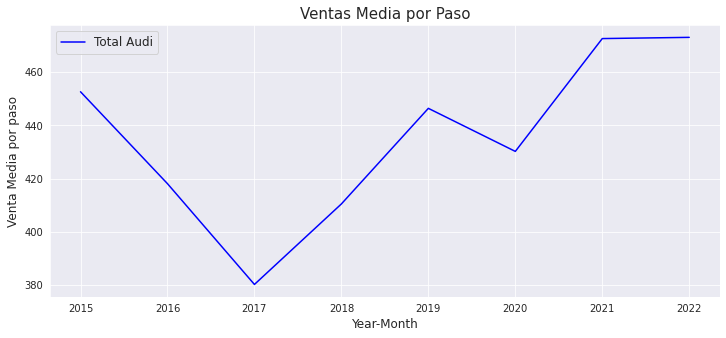

In [71]:
plt.figure(figsize=(12,5))
df_audi.groupby(['year'])['Fact_total'].mean().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Venta Media por paso', size=12)
plt.title('Ventas Media por Paso', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

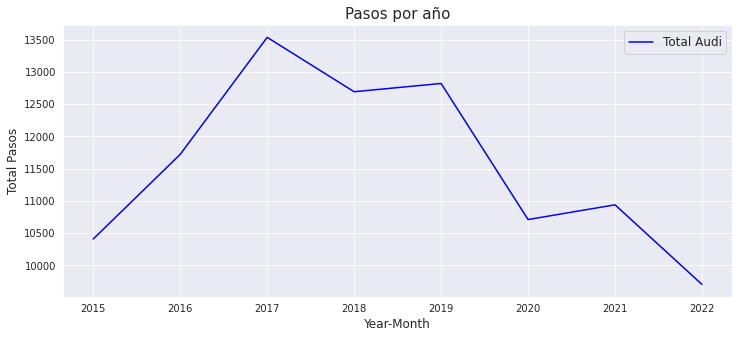

In [72]:
plt.figure(figsize=(12,5))
df_audi.groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Pasos', size=12)
plt.title('Pasos por año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

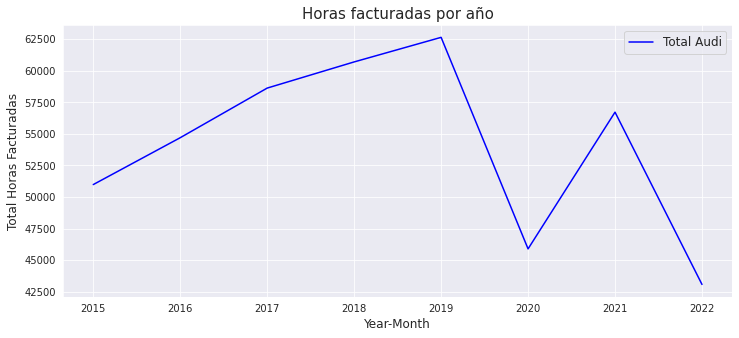

In [73]:
plt.figure(figsize=(12,5))
df_audi.groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Horas Facturadas', size=12)
plt.title('Horas facturadas por año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()

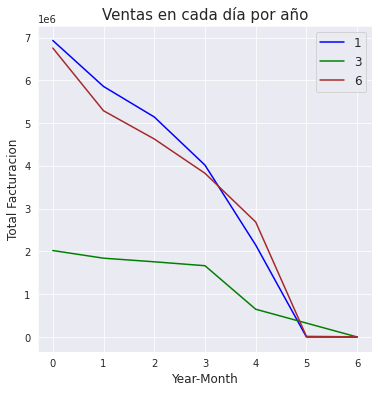

In [74]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(6,6))
df_audi[df_audi['Tall']=='1'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
"""df_audi[df_audi['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_audi[df_audi['Tall']=='3'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
"""df_audi[df_audi['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Facturacion', size=12)
plt.title('Ventas en cada día por año', size=15)
plt.legend(fontsize=12)
plt.show()

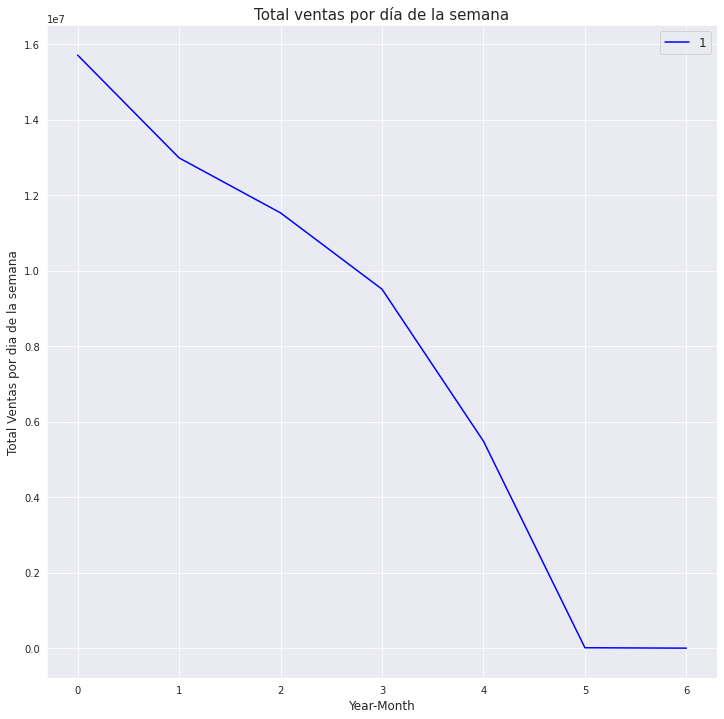

In [75]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df_audi.groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Ventas por dia de la semana', size=12)
plt.title('Total ventas por día de la semana', size=15)
plt.legend(fontsize=12)
plt.show()

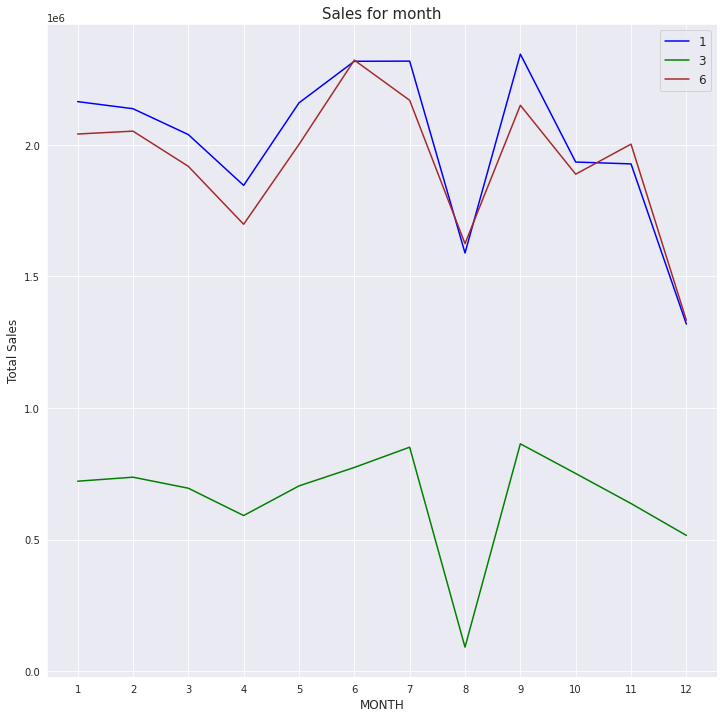

In [76]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_audi[df_audi['Tall']=='1'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
"""df_audi[df_audi['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_audi[df_audi['Tall']=='3'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
"""df_audi[df_audi['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)
plt.show()

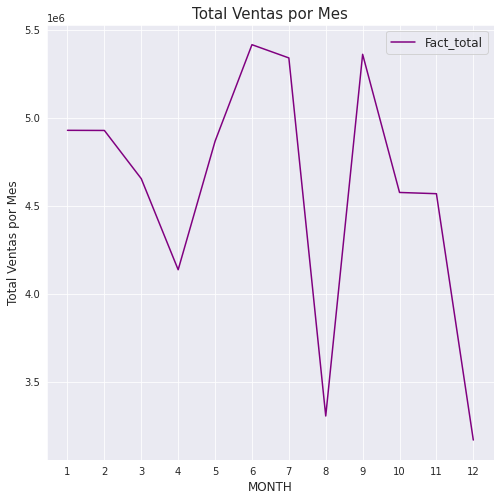

In [77]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(8,8))
df_audi.groupby(['month'])['Fact_total'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Ventas por Mes', size=12)
plt.title('Total Ventas por Mes', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

In [78]:
df_audi.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

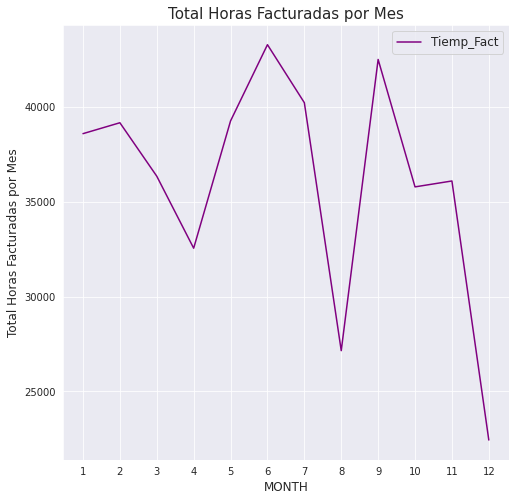

In [79]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(8,8))
df_audi.groupby(["month"])['Tiemp_Fact'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Horas Facturadas por Mes', size=12)
plt.title('Total Horas Facturadas por Mes', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

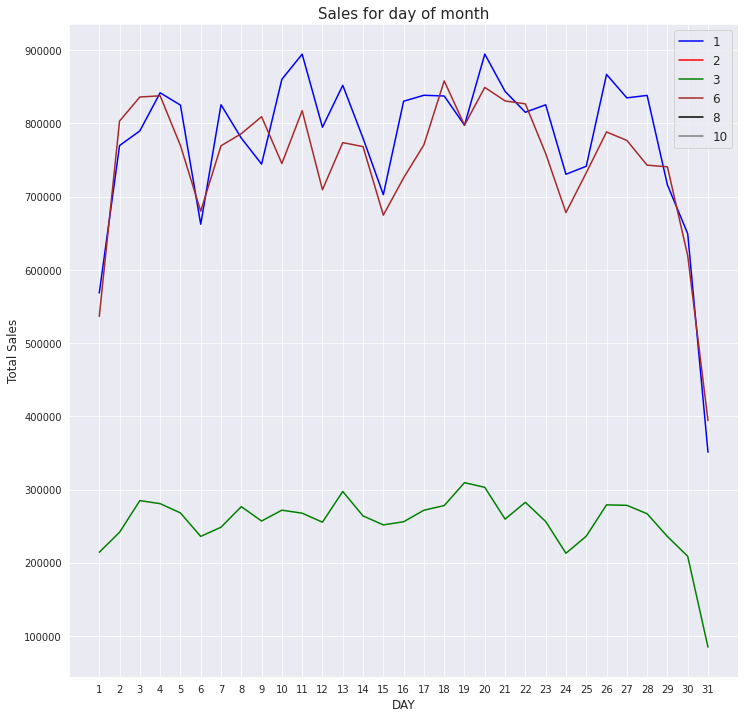

In [80]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_audi[df_audi['Tall']=='1'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df_audi[df_audi['Tall']=='2'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df_audi[df_audi['Tall']=='3'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_audi[df_audi['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

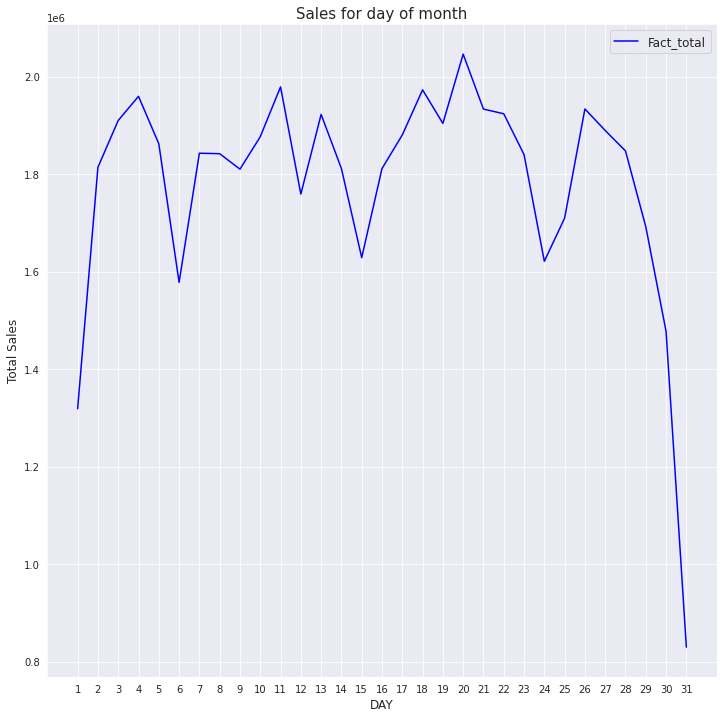

In [81]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_audi.groupby(['day'])['Fact_total'].sum().plot(kind='line',color='blue')

# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

In [82]:
df_cohort_audi = df_audi.copy()

- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra. 

In [ ]:
"""# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['Fecha_Apertura'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])"""

In [83]:
# voy a intentar cambiar de mes a año. 
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort_audi['InvoiceYear'] = df_cohort_audi['Fecha_Apertura'].dt.strftime("%Y") # Estamos convirtiendo tanto el mes como el día a 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort_audi['InvoiceYear'] = pd.to_datetime(df_cohort_audi['InvoiceYear'])

In [84]:
df_cohort_audi.InvoiceYear

9        2015-01-01
35       2015-01-01
37       2015-01-01
39       2015-01-01
45       2015-01-01
            ...    
301809   2022-01-01
301823   2022-01-01
301824   2022-01-01
301825   2022-01-01
301827   2022-01-01
Name: InvoiceYear, Length: 127644, dtype: datetime64[ns]

In [85]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort_audi['CohortYear'] = df_cohort_audi.groupby('Bastidor')['InvoiceYear'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort_audi['CohortYear'] = pd.to_datetime(df_cohort_audi['CohortYear'])

In [86]:
df_cohort_audi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127644 entries, 9 to 301827
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            127644 non-null  object        
 1   Referencia      127644 non-null  object        
 2   Fecha_Fact      127644 non-null  datetime64[ns]
 3   Fecha_Apertura  127644 non-null  datetime64[ns]
 4   Cta_Cargo       127644 non-null  object        
 5   Nombre_Cliente  127644 non-null  object        
 6   Cta_Titular     127644 non-null  object        
 7   Nombre_Titular  127644 non-null  object        
 8   Recamb          127644 non-null  float64       
 9   Recamb_Pvp      127644 non-null  float64       
 10  Tiemp_Fact      127642 non-null  float64       
 11  Total_Mo        127644 non-null  float64       
 12  Modelo          127644 non-null  object        
 13  Recep           127644 non-null  object        
 14  Matricula       127644 non-null  obj

In [ ]:
"""# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])"""

In [87]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_Year(d1, d2):
    return((d1.dt.year - d2.dt.year))
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort_audi['CohortPeriod'] = diff_Year(df_cohort_audi['InvoiceYear'], df_cohort_audi['CohortYear'])

In [88]:
df_cohort_audi.sample(5)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week,InvoiceYear,CohortYear,CohortPeriod
54141,1,8980491,2016-09-16,2016-08-30,3150,ARVAL SERVICE LEASE SA,3150,ARVAL SERVICE LEASE SA,610.11,1220.22,8.86,523.97,AUDI A3 SP,272,7261JCC,WAUZZZ8V0FA070325,7A PRESUPUESTO CH AUDI,nan,9,2016,17,898049,1134.08,898049,2016,8,30,1,2016-01-01,2016-01-01,0
214492,1,12331231,2020-07-17,2020-07-17,150460,NOVERNERGY SOLUTIONS SL,150460,NOVERNERGY SOLUTIONS SL,732.20,1464.40,1.50,82.86,AUDI S6 4.,294,2079KJL,WAUZZZ4G6JN087672,2A O.R.CLIENT MEC AUDI,nan,7,2020,0,1233123,815.06,1233123,2020,7,17,4,2020-01-01,2019-01-01,1
221595,1,12459451,2020-10-27,2020-10-19,63105,PABLO CEREZO HERRERO,63105,PABLO CEREZO HERRERO,747.45,1544.49,6.00,510.26,A3 SPORTBA,294,4754DTD,WAUZZZ8P26A092120,2A O.R.CLIENT MEC AUDI,nan,10,2020,8,1245945,1257.71,1245945,2020,10,19,0,2020-01-01,2015-01-01,5
31552,1,8445801,2016-01-21,2016-01-19,115657,ZABALA DE LAMO MARIA ES,115657,ZABALA DE LAMO MARIA ES,537.54,1075.08,3.48,304.58,AUDI A4 2.,52,0018GFY,WAUZZZ8K69N002887,2A O.R.CLIENT MEC AUDI,nan,1,2016,2,844580,842.12,844580,2016,1,19,1,2016-01-01,2015-01-01,1
17981,3,8154003,2015-07-29,2015-07-28,610662,GASTOS ASUMIDOS POR TAL,17195,DEL AMO CAMPO JORGE,18.28,36.56,0.15,7.20,AUDI Q5 2.,63,9887GZP,WAUZZZ8R1BA040666,DG DEFER.GARANTIA AUDI,nan,7,2015,1,815400,25.48,815400,2015,7,28,1,2015-01-01,2015-01-01,0


In [89]:
customer_cohort_audi = df_cohort_audi.pivot_table(index='CohortYear', columns='CohortPeriod', values='Bastidor', aggfunc='nunique')
customer_cohort_audi
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7
CohortYear,,,,,,,,
2015-01-01,7262.0,3649.0,3574.0,2683.0,2273.0,1736.0,1594.0,1230.0
2016-01-01,4188.0,1760.0,1822.0,1153.0,1029.0,736.0,696.0,NaN
2017-01-01,3695.0,1338.0,1267.0,847.0,693.0,488.0,NaN,NaN
2018-01-01,3194.0,1165.0,1072.0,727.0,611.0,NaN,NaN,NaN
2019-01-01,3424.0,1019.0,1125.0,697.0,NaN,NaN,NaN,NaN
2020-01-01,2723.0,765.0,818.0,NaN,NaN,NaN,NaN,NaN
2021-01-01,2658.0,799.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,2328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por año
        - por ejemplo 8859 del 2016 son los nuevos clientes diferentes de la primera fecha que es el 2015. al siguiente año fueron 7419 nuevos diferentes a abril del 2015 y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo de los 13975 clientes dem 2015 el siguiente año repiten 6630 en el año 2 repiten 6624 y asi sucesivamente.  

In [90]:
customer_cohort_audi.to_excel("/content/drive/MyDrive/Colab Notebooks/pivot_audi.xlsx", index=False)

In [91]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort_audi.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort_audi.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7
2015-01-01,100.0,50.2,49.2,36.9,31.3,23.9,21.9,16.9
2016-01-01,100.0,42.0,43.5,27.5,24.6,17.6,16.6,NaN
2017-01-01,100.0,36.2,34.3,22.9,18.8,13.2,NaN,NaN
2018-01-01,100.0,36.5,33.6,22.8,19.1,NaN,NaN,NaN
2019-01-01,100.0,29.8,32.9,20.4,NaN,NaN,NaN,NaN
2020-01-01,100.0,28.1,30.0,NaN,NaN,NaN,NaN,NaN
2021-01-01,100.0,30.1,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


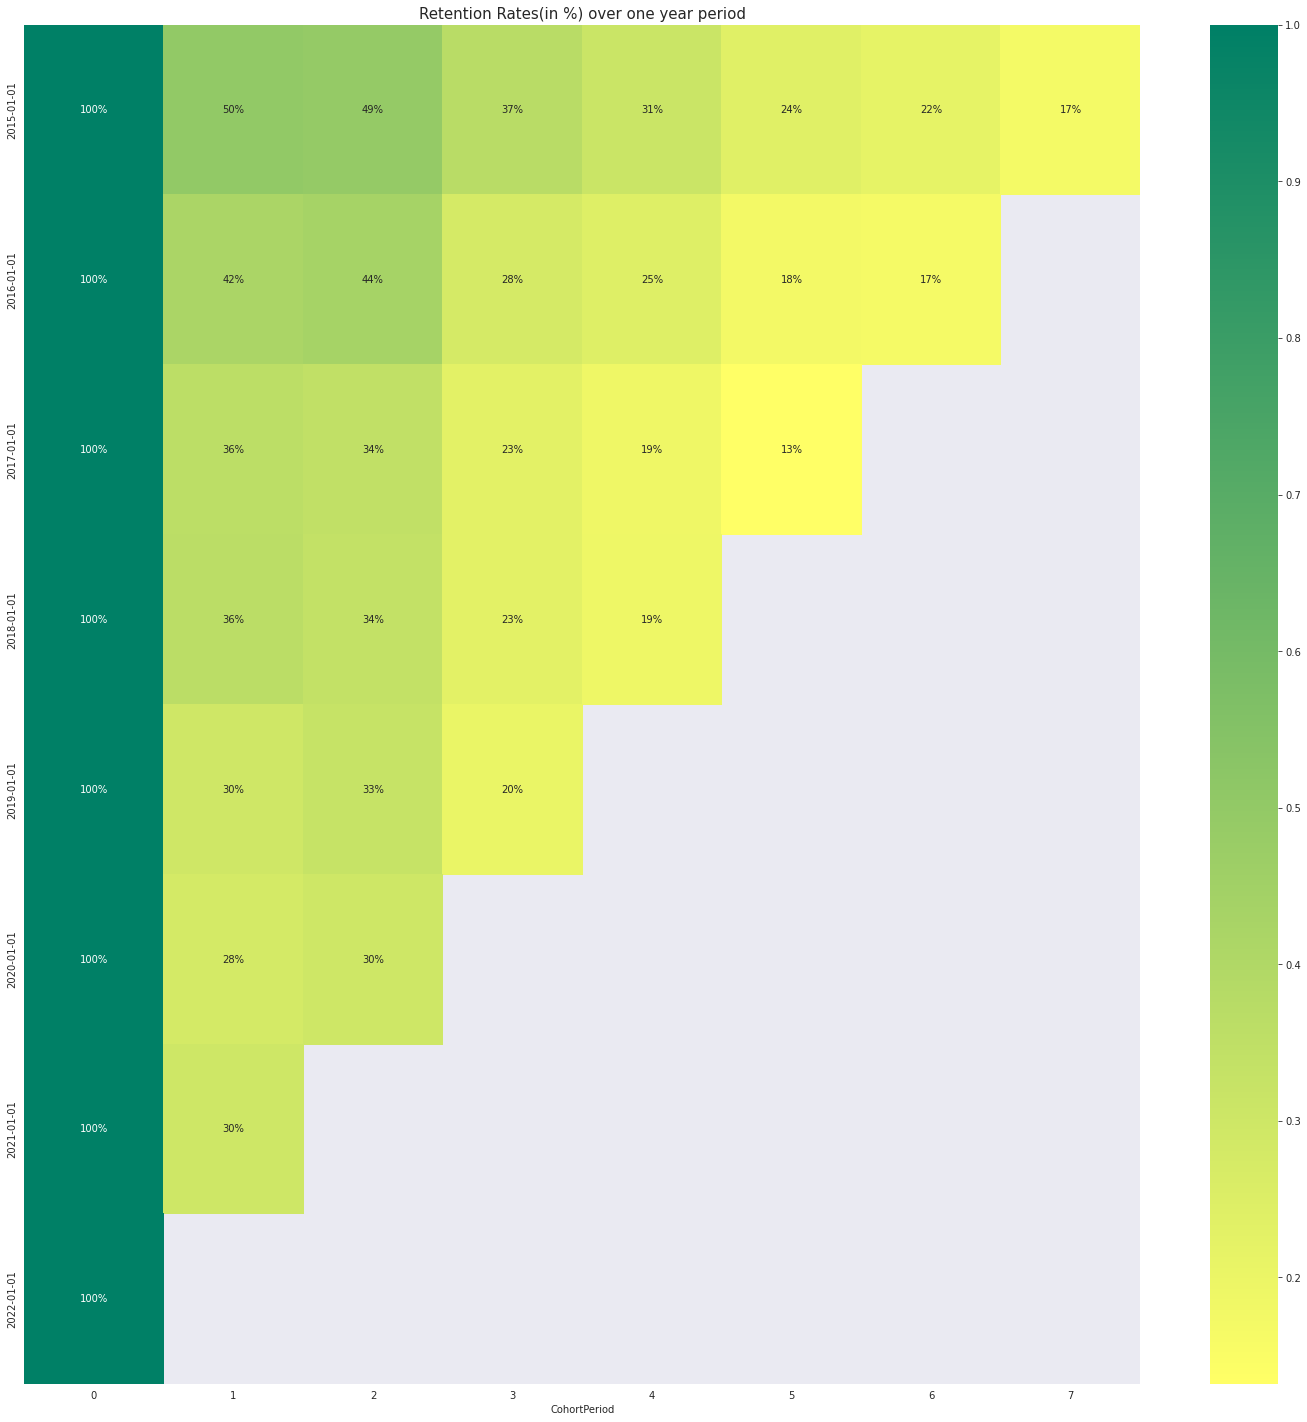

In [92]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(25, 25))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 
# tengo que hacerlo por años salen muchos meses, aparte de quitar los años anteriores al 2015

In [93]:
amount_cohort_audi = df_cohort_audi.pivot_table(index='CohortYear', columns='CohortPeriod', values='Fact_total', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort_audi
# aqui estamos sacando la facturación media por paso de clientes en cada fecha. 

CohortPeriod,0,1,2,3,4,5,6,7
CohortYear,,,,,,,,
2015-01-01,452.61,435.64,420.83,481.02,528.80,473.61,539.72,514.66
2016-01-01,398.85,363.20,396.43,477.25,445.00,493.75,487.50,NaN
2017-01-01,338.90,382.86,411.91,415.79,483.85,496.20,NaN,NaN
2018-01-01,360.73,405.53,404.95,458.02,460.76,NaN,NaN,NaN
2019-01-01,399.51,435.53,439.31,491.63,NaN,NaN,NaN,NaN
2020-01-01,409.60,450.07,467.66,NaN,NaN,NaN,NaN,NaN
2021-01-01,445.45,498.82,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,428.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM ANALISIS

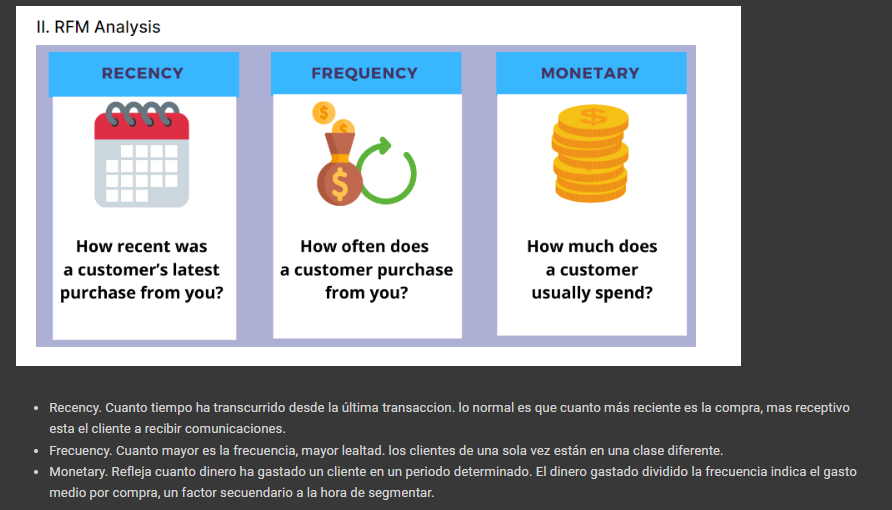

In [94]:
df_rfm_audi = df_audi.copy() # hacemos la copia del original. 

In [95]:
print("la fecha va desde {} a {}".format(df_rfm_audi.Fecha_Apertura.min(), df_rfm_audi.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2022-10-31 00:00:00


In [96]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm_audi.groupby('Bastidor')['Fecha_Apertura'].max().reset_index())
# creamos la variable recency
recency['Fecha_Apertura'] = pd.to_datetime(recency['Fecha_Apertura']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['Fecha_Apertura'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['Fecha_Apertura']).dt.days + 1 # diferencia entre la fecha maxima de todas las facturas y la fecha maxima del bastidor en cuestión. 
recency = recency[['Bastidor','recency']] # elegimos las variables a mostrar. 
recency.head()

,Bastidor,recency
0,WAUZZZ4L97D07664,753
1,WAUZZZ8E55A50910,1800
2,WAUZZZ8P07A02124,509
3,WAUZZZ8P1CA04845,2399
4,WAUZZZ8T4EA06800,960


In [97]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm_audi.groupby('Bastidor')['Orden_Corta2'].nunique().reset_index())
frequency.columns = ['fBastidor','frequency']
frequency.head()

,fBastidor,frequency
0,WAUZZZ4L97D07664,5
1,WAUZZZ8E55A50910,1
2,WAUZZZ8P07A02124,2
3,WAUZZZ8P1CA04845,1
4,WAUZZZ8T4EA06800,6


In [98]:
frequency.isnull().sum()

fBastidor    0
frequency    0
dtype: int64

In [99]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm_audi.groupby('Bastidor')['Fact_total'].sum().reset_index())
monetary.columns = ['mBastidor','monetary']
monetary.head()

,mBastidor,monetary
0,WAUZZZ4L97D07664,1233.45
1,WAUZZZ8E55A50910,1144.53
2,WAUZZZ8P07A02124,757.33
3,WAUZZZ8P1CA04845,208.16
4,WAUZZZ8T4EA06800,4483.83


In [100]:
# combining the three into one table

rfm_audi = pd.concat([recency,frequency,monetary], axis=1) # este es el nombre de cada dataframe
rfm_audi.drop(['fBastidor',"mBastidor"], axis=1, inplace=True)
rfm_audi.head(10)

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,753,5,1233.45
1,WAUZZZ8E55A50910,1800,1,1144.53
2,WAUZZZ8P07A02124,509,2,757.33
3,WAUZZZ8P1CA04845,2399,1,208.16
4,WAUZZZ8T4EA06800,960,6,4483.83
5,WAUZZZ8TX8A00452,1812,1,156.80
6,WAUZZZ8X1EB11477,2314,1,261.59
7,WAUZZZ8X3HB04230,1141,1,388.49
8,000000000FC001550,2624,1,36.66
9,0JN1TC32U00005574,2043,1,39.00


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad d

In [101]:
#LO QUE VAMOS A SACAR EL EL PROMEDI ENTRE VISITA Y VISITA. 
# extracting SPEED OF VISIT

Bastidor_list = list(df_rfm_audi.Bastidor.unique()) # creamos una lista con unicos de BAstidor
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in Bastidor_list:  # vamos a recorrer la lista de arriba. es decir la columna de Bastidores
    sov = df_rfm_audi[df_rfm_audi['Bastidor']==ids].groupby('Fecha_Apertura')['Orden_Corta2'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm_audi.Bastidor que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por Fecha_Apertura e Orden_Corta2 y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['Fecha_Apertura1'] = sov['Fecha_Apertura'].shift(1) # generamos Fecha_Apertura1 que es el dato desplazado una posición
        sov['Difference'] = (sov['Fecha_Apertura']-sov['Fecha_Apertura1']).dt.days # generamos otra difference que es la diferencia entre Fecha_Apertura y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sBastidor'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sBastidor').reset_index(drop=True) # ordenamos
speed_of_visit.head()

,sBastidor,sov
0,WAUZZZ4L97D07664,452.0
1,WAUZZZ8E55A50910,0.0
2,WAUZZZ8P07A02124,0.0
3,WAUZZZ8P1CA04845,0.0
4,WAUZZZ8T4EA06800,211.0


In [102]:
speed_of_visit.to_csv("/content/drive/MyDrive/Colab Notebooks/speed_of_visit_AUDI.csv")

In [103]:
df_rfm_audi.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [104]:
# checking the overall highlights. The number of distinct customers are 4334
rfm_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29472 entries, 0 to 29471
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   29472 non-null  object 
 1   recency    29472 non-null  int64  
 2   frequency  29472 non-null  int64  
 3   monetary   29472 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 921.1+ KB


In [105]:
# combining the three into one table

rfm_audi = pd.concat([recency,frequency,monetary,speed_of_visit], axis=1) # este es el nombre de cada dataframe
rfm_audi.drop(['fBastidor',"mBastidor", "sBastidor"], axis=1, inplace=True)
rfm_audi.head(100)

,Bastidor,recency,frequency,monetary,sov
0,WAUZZZ4L97D07664,753,5,1233.45,452.0
1,WAUZZZ8E55A50910,1800,1,1144.53,0.0
2,WAUZZZ8P07A02124,509,2,757.33,0.0
3,WAUZZZ8P1CA04845,2399,1,208.16,0.0
4,WAUZZZ8T4EA06800,960,6,4483.83,211.0
...,...,...,...,...,...
95,TRUZZZ8J071002033,29,5,3488.81,190.0
96,TRUZZZ8J071038207,2553,1,370.77,0.0
97,TRUZZZ8J081011428,2436,1,443.08,0.0
98,TRUZZZ8J081012627,1054,6,2867.46,279.0


In [106]:
# checking the summary
rfm_audi.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,recency,frequency,monetary,sov
count,29472.000000,29472.000000,29472.000000,29472.000000
mean,1034.374796,3.139963,1874.180877,95.327226
std,826.320143,2.894464,2502.771357,168.229780
min,1.000000,1.000000,0.000000,0.000000
25%,285.000000,1.000000,369.370000,0.000000
50%,841.000000,2.000000,972.115000,0.000000
75%,1688.000000,4.000000,2446.907500,174.250000
90%,2323.000000,7.000000,4712.879000,363.000000
95%,2576.000000,9.000000,6637.007000,464.000000
99%,2805.000000,13.000000,11617.663100,655.290000


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.


In [107]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm_audi['recency_score'] = pd.cut(rfm_audi['recency'], bins=[0,150,364,720,1092,2860], labels=[10,9,8,-2,-15]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm_audi['recency_score'] = rfm_audi['recency_score'].astype('float')
rfm_audi['frequency_score'] = pd.cut(rfm_audi['frequency'], bins=[0,1,2,4,7,63], labels=[1,2,3,8,10])
# hacemos los cortes por los estadísticos de arriba. 
rfm_audi['frequency_score'] = rfm_audi['frequency_score'].astype('float')
rfm_audi['monetary_score'] = pd.cut(rfm_audi['monetary'], bins=[-1,366,972,2483,4659,124630], labels=[1,2,3,4,5])
# igual que los anteriores. 
rfm_audi['monetary_score'] = rfm_audi['monetary_score'].astype('float')

rfm_audi['sov_score'] = pd.cut(rfm_audi['sov'], bins=[-1,50,315,780,810,917], labels=[1,6,5,4,0]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm_audi['sov_score'] = rfm_audi['sov_score'].astype('float')

In [ ]:
rfm_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28921 entries, 0 to 28920
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bastidor         28921 non-null  object 
 1   recency          28921 non-null  int64  
 2   frequency        28921 non-null  int64  
 3   monetary         28921 non-null  float64
 4   sov              28921 non-null  float64
 5   recency_score    28921 non-null  float64
 6   frequency_score  28921 non-null  float64
 7   monetary_score   28921 non-null  float64
 8   sov_score        28921 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.0+ MB


In [108]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score']) + (x["sov_score"])
# esta función suma los tres valores. 
rfm_audi['score'] = rfm_audi.apply(score_rfm,axis=1 ) # añadimos la variable score al dataframe. 
rfm_audi.head()

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
0,WAUZZZ4L97D07664,753,5,1233.45,452.0,-2.0,8.0,3.0,5.0,14.0
1,WAUZZZ8E55A50910,1800,1,1144.53,0.0,-15.0,1.0,3.0,1.0,-10.0
2,WAUZZZ8P07A02124,509,2,757.33,0.0,8.0,2.0,2.0,1.0,13.0
3,WAUZZZ8P1CA04845,2399,1,208.16,0.0,-15.0,1.0,1.0,1.0,-12.0
4,WAUZZZ8T4EA06800,960,6,4483.83,211.0,-2.0,8.0,4.0,6.0,16.0


In [109]:
rfm_audi.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    29472.000000
mean         6.010552
std         14.092627
min        -12.000000
25%        -10.000000
50%          6.000000
75%         16.000000
90%         26.000000
95%         29.000000
99%         31.000000
max         31.000000
Name: score, dtype: float64

In [110]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways
# se puede hacer de muchas maneras pero vamos a hacer los cortes por los estadísticos. 

rfm_audi['customer_type'] = pd.cut(rfm_audi['score'], bins=[-4,0,11,16,26,32], labels=['CAT5','CAT4','CAT3','CAT2','CAT1'])
rfm_audi.sample(10)

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score,customer_type
6091,WAUZZZ8E55A086227,687,8,3575.85,357.0,8.0,10.0,4.0,5.0,27.0,CAT1
23254,WAUZZZF32N1069306,141,1,1039.34,0.0,10.0,1.0,3.0,1.0,15.0,CAT3
17445,WAUZZZ8UXJR021490,323,5,1299.86,199.0,9.0,8.0,3.0,6.0,26.0,CAT2
20575,WAUZZZ8VXGA103963,266,8,4249.99,296.0,9.0,10.0,4.0,6.0,29.0,CAT1
18139,WAUZZZ8V2FA070083,320,4,1184.45,742.0,9.0,3.0,3.0,5.0,20.0,CAT2
11641,WAUZZZ8P4BA159830,1672,1,628.38,0.0,-15.0,1.0,2.0,1.0,-11.0,NaN
24310,WAUZZZF42KA097871,484,2,1007.82,0.0,8.0,2.0,3.0,1.0,14.0,CAT3
28410,WAUZZZGB6KR034173,832,1,43.22,0.0,-2.0,1.0,1.0,1.0,1.0,CAT4
21661,WAUZZZ8X5GB073654,1784,1,222.41,0.0,-15.0,1.0,1.0,1.0,-12.0,NaN
14218,WAUZZZ8R7CA012064,2002,5,2188.30,180.0,-15.0,8.0,3.0,6.0,2.0,CAT4


In [111]:
rfm_audi.isnull().sum()

Bastidor               0
recency                0
frequency              0
monetary               0
sov                    0
recency_score          0
frequency_score        0
monetary_score         0
sov_score              0
score                  0
customer_type      10329
dtype: int64

In [112]:
rfm_audi.describe()

,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
count,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000
mean,1034.374796,3.139963,1874.180877,95.327226,-2.258754,3.330076,2.599552,2.339678,6.010552
std,826.320143,2.894464,2502.771357,168.229780,11.141196,3.037565,1.279584,2.094753,14.092627
min,1.000000,1.000000,0.000000,0.000000,-15.000000,1.000000,1.000000,0.000000,-12.000000
25%,285.000000,1.000000,369.370000,0.000000,-15.000000,1.000000,2.000000,1.000000,-10.000000
50%,841.000000,2.000000,972.115000,0.000000,-2.000000,2.000000,3.000000,1.000000,6.000000
75%,1688.000000,4.000000,2446.907500,174.250000,9.000000,3.000000,3.000000,5.000000,16.000000
max,2860.000000,60.000000,81583.490000,916.000000,10.000000,10.000000,5.000000,6.000000,31.000000


In [113]:
rfm_audi.to_excel("/content/drive/MyDrive/Colab Notebooks/RFM_AUDI.xlsx", index=False)

In [114]:
round(rfm_audi.customer_type.value_counts(normalize=True)*100,0)

CAT3    37.0
CAT4    26.0
CAT2    19.0
CAT1    15.0
CAT5     2.0
Name: customer_type, dtype: float64

- podemos ver el 9% son platinum, que combinados con los gold suman el 24%. estos son los mejores clientes. 
- los silver son aquellos en los que podemos enfocarnos para convertirlos en gold o platinum. 
- los bad son aquellos que no están comprometidos con el negocio y no ponen mucho esfuerzo por venir. 

In [115]:
# looking the RFM value for each of the category
rfm_audi.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
CAT5,1724.0,4.0,2936.0
CAT4,1031.0,3.0,1609.0
CAT3,347.0,2.0,1022.0
CAT2,356.0,5.0,3023.0
CAT1,215.0,9.0,6316.0


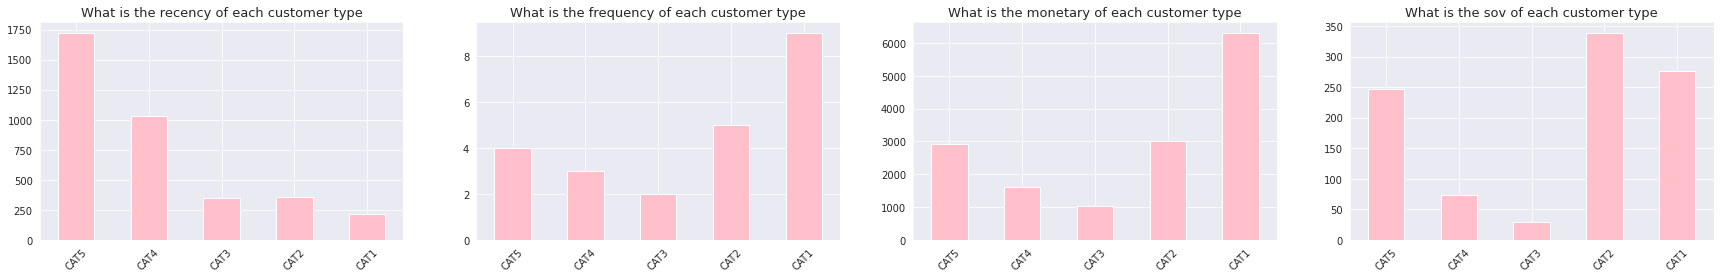

In [116]:
column = ['recency','frequency','monetary',"sov"]
plt.figure(figsize=(30,4))
for i,j in enumerate(column):
    plt.subplot(1,4,i+1)
    rfm_audi.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='pink')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

## K-MEANS CLUSTERING

In [ ]:
# copying the data into new variable
df_kmeans = rfm_audi.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,692,5,1233.45
1,WAUZZZ8E55A50910,1739,1,1144.53
2,WAUZZZ8P07A02124,448,2,757.33
3,WAUZZZ8P1CA04845,2338,1,208.16
4,WAUZZZ8T4EA06800,899,6,4483.83


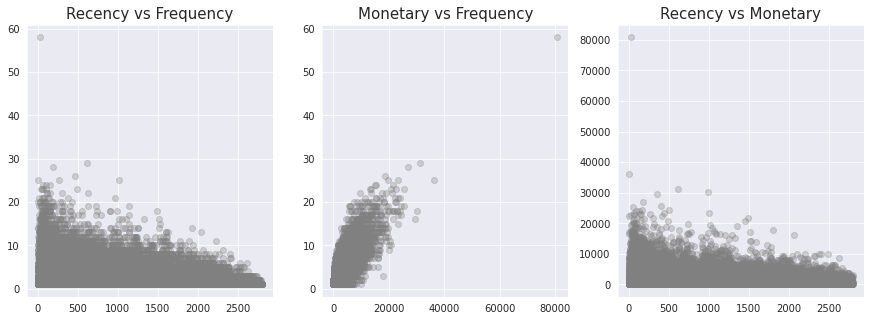

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1) # UNA FILA, TRES GRAFICOS POR FILA, Y LO HACEMOS EN LA PRIMERA. 
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='grey', alpha=0.3) # en este primero metemos el kmeans de recency y frecuenciy 
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='grey', alpha=0.3) # en este segundo metemos monetary y frecuency
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='grey', alpha=0.3) # en el tercero recency vs monetary
plt.title('Recency vs Monetary', size=15)
plt.show()

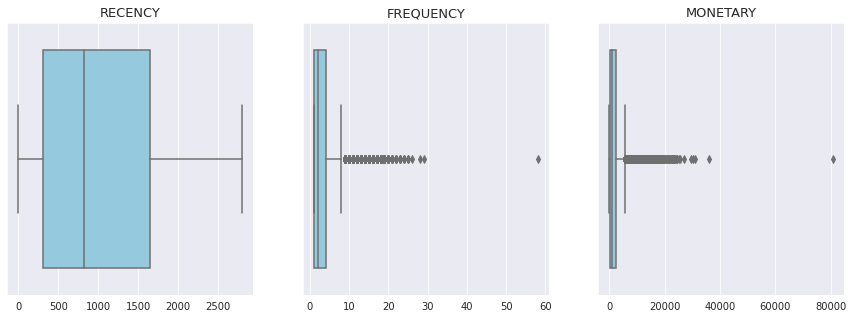

In [ ]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [ ]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [ ]:
# resetting the index
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28829 entries, 0 to 28828
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   28829 non-null  object 
 1   recency    28829 non-null  int64  
 2   frequency  28829 non-null  int64  
 3   monetary   28829 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 901.0+ KB


In [ ]:
# looking at random 5 rows
df_kmeans.sample(5)

,Bastidor,recency,frequency,monetary
24938,WAUZZZF49LN010137,766,2,1126.50
7181,WAUZZZ8K0DA029194,1879,6,4885.84
26830,WAUZZZGA1JA106322,728,1,2616.99
6960,WAUZZZ8F8AN001375,625,4,2284.09
19118,WAUZZZ8V6FA155587,22,7,3853.57


In [ ]:
# removing customer id as it will not used in making cluster
df_kmeans = df_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,-0.407428,0.707450,-0.257895
1,0.898389,-0.761565,-0.298061
2,-0.711744,-0.394312,-0.472964
3,1.645461,-0.761565,-0.721031
4,-0.149258,1.074704,1.210341


- inicialmente sin ningún conocimiento estamos clusterizando los datos en 5 clusters. La unica intuición que tenemos es RFM, con lo cual categorizamos en 5.
- mas tarde veremos más metodos para optimizar el valor de K

In [ ]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [ ]:
# checking the labels
model_clus5.labels_

array([1, 0, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
df_kmeans['clusters'] = model_clus5.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,692,5,1233.45,1
1,1739,1,1144.53,0
2,448,2,757.33,2
3,2338,1,208.16,0
4,899,6,4483.83,3


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,2041.0,2.0,892.0
1,580.0,4.0,2426.0
2,568.0,2.0,664.0
3,566.0,7.0,5081.0
4,382.0,11.0,9748.0


- METODO DEL CODO

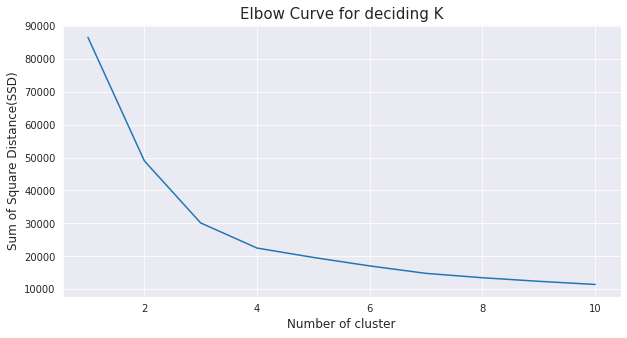

In [ ]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [ ]:
# Silhouette analysis

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4812086644909566
For n_clusters=3, the silhouette score is 0.4333551317407551
For n_clusters=4, the silhouette score is 0.4312498221065225
For n_clusters=5, the silhouette score is 0.3965536319320673
For n_clusters=6, the silhouette score is 0.34242655397286376
For n_clusters=7, the silhouette score is 0.3597232741456157
For n_clusters=8, the silhouette score is 0.36249391814107834
For n_clusters=9, the silhouette score is 0.3496732706165278
For n_clusters=10, the silhouette score is 0.32678873922987656


In [ ]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [ ]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,692,5,1233.45,0
1,1739,1,1144.53,2
2,448,2,757.33,0
3,2338,1,208.16,2
4,899,6,4483.83,1


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,539.0,2.0,1120.0
1,519.0,8.0,5686.0
2,2002.0,2.0,946.0


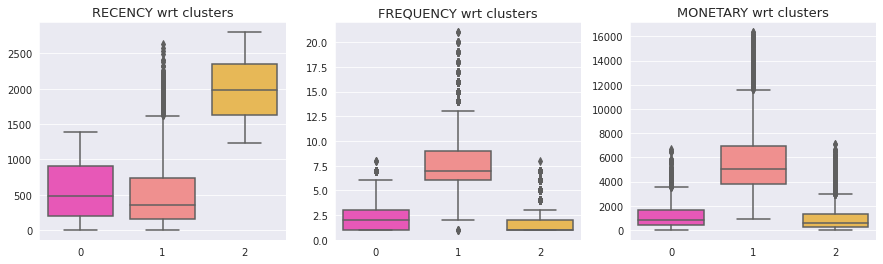

In [ ]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

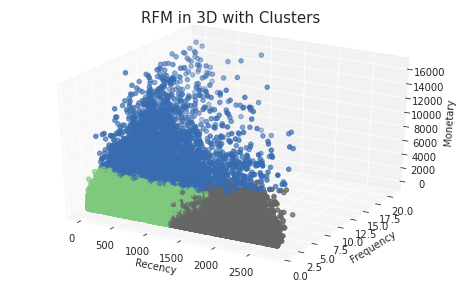

In [ ]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

#AQUI VOY A HACER EL DE CARROCERÍA PARA MARKETING. 

In [117]:
import pandas as pd

In [118]:
xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 

In [119]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [120]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [121]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [122]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [123]:
print("la fecha va desde {} a {}".format(df.Fecha_Fact.min(), df.Fecha_Fact.max()))

la fecha va desde 2015-01-02 00:00:00 a 2022-10-31 00:00:00


In [124]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Nombre_Cliente"] = df["Nombre_Cliente"].apply(str)
df["Cta_Titular"] = df["Cta_Titular"].apply(str)
df["Nombre_Titular"] = df["Nombre_Titular"].apply(str)
df["Modelo"] = df["Modelo"].apply(str)
df["Recep"] = df["Recep"].apply(str)
df["Matricula"] = df["Matricula"].apply(str)
df["Bastidor"] = df["Bastidor"].apply(str)
df["Tipo_Or"] = df["Tipo_Or"].apply(str)


In [125]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [126]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [127]:
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("5")!=True]
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("6")!=True]

In [128]:
df_carroceria = df[df["Tipo_Or"].str.startswith("7")==True]

In [129]:
df_carroceria.isnull().sum()

Tall                 0
Referencia           0
Fecha_Fact        1560
Fecha_Apertura       0
Cta_Cargo            0
Nombre_Cliente       0
Cta_Titular          0
Nombre_Titular       0
Recamb               0
Recamb_Pvp           0
Tiemp_Fact           0
Total_Mo             0
Modelo               0
Recep                0
Matricula            0
Bastidor             0
Tipo_Or              0
Or_Unica             0
MES                  0
AÑO                  0
ESTANCIA             0
Orden_Corta          0
Fact_total           0
Orden_Corta2         0
dtype: int64

In [130]:
df_carroceria = df[~df.Fecha_Fact.isnull()]

In [131]:
df_carroceria.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        5
Total_Mo          5
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        5
Orden_Corta2      0
dtype: int64

In [132]:
# veces que ha venido a chapa. 
visitas = pd.DataFrame(df_carroceria.groupby("Bastidor")["Orden_Corta2"].nunique().reset_index())
visitas.columns = ["vBastidor", "visitas"]
visitas.head()

,vBastidor,visitas
0,WAUZZZ4L97D07664,5
1,WAUZZZ8E55A50910,1
2,WAUZZZ8P07A02124,2
3,WAUZZZ8P1CA04845,1
4,WAUZZZ8T4EA06800,6


In [133]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50979 entries, 0 to 50978
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vBastidor  50979 non-null  object
 1   visitas    50979 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 796.7+ KB


In [134]:
ultima_visita = pd.DataFrame(df_carroceria.groupby("Bastidor")["Fecha_Fact"].max().reset_index())
ultima_visita.columns = ["uBastidor", "Ulti_visita"]
ultima_visita.head()


,uBastidor,Ulti_visita
0,WAUZZZ4L97D07664,2020-10-09
1,WAUZZZ8E55A50910,2017-12-20
2,WAUZZZ8P07A02124,2021-09-06
3,WAUZZZ8P1CA04845,2016-04-15
4,WAUZZZ8T4EA06800,2020-03-16


In [135]:
ultima_visita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50979 entries, 0 to 50978
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   uBastidor    50979 non-null  object        
 1   Ulti_visita  50979 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 796.7+ KB


In [136]:
df_carroceria_marketing = pd.concat([visitas, ultima_visita], axis=1)
df_carroceria_marketing.drop([ "uBastidor"], axis=1, inplace=True)
df_carroceria_marketing.head()

,vBastidor,visitas,Ulti_visita
0,WAUZZZ4L97D07664,5,2020-10-09
1,WAUZZZ8E55A50910,1,2017-12-20
2,WAUZZZ8P07A02124,2,2021-09-06
3,WAUZZZ8P1CA04845,1,2016-04-15
4,WAUZZZ8T4EA06800,6,2020-03-16


In [137]:
df_carroceria_marketing.to_excel("/content/drive/MyDrive/Colab Notebooks/Carroceria_unicos.xlsx", index=False)